# Project 5 Statistical Analysis

### Kaggle Dataset Description:

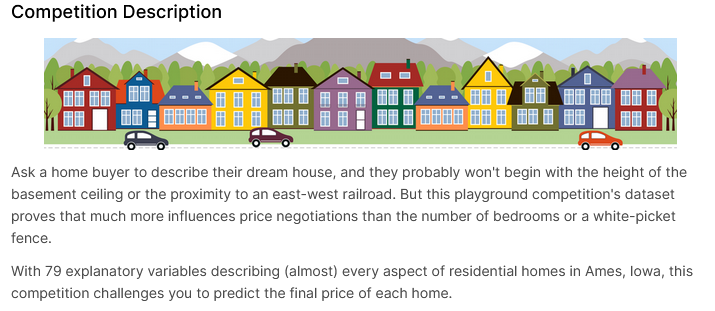

### Ironhack Project Description:

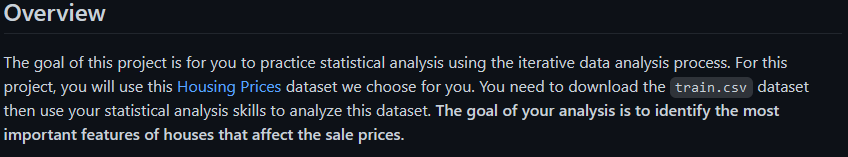

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools 

### EDA

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.drop(['Id'], axis=1, inplace=True)

In [7]:
print(df.shape[0], 'rows and', df.shape[1], 'columns')

1460 rows and 80 columns


In [8]:
quantitative = [i for i in df.columns if df.dtypes[i] != 'object']
qualitative = [i for i in df.columns if df.dtypes[i] == 'object']

print(len(quantitative) + len(qualitative))

80


In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-10-5e89c5433ea4>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


<AxesSubplot:title={'center':'House Sale Price Histogram'}, xlabel='Price', ylabel='Weight'>

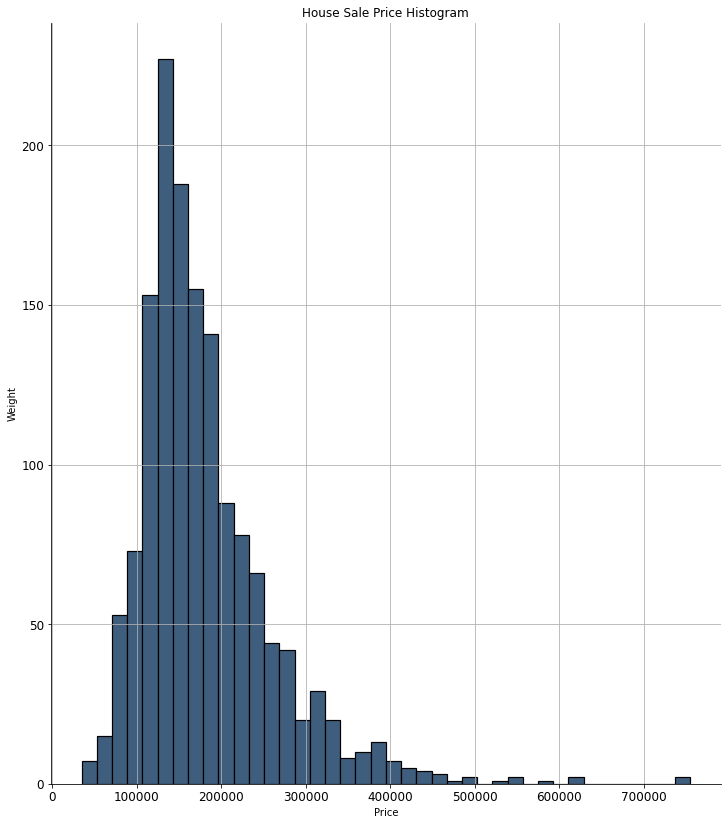

In [10]:
plt.figure(figsize=(12, 14), facecolor='w')
ax = plt.subplot(111)    

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

plt.title('House Sale Price Histogram')
plt.ylabel('Weight')
plt.xlabel('Price')

df['SalePrice'].hist(bins = 40, color="#3F5D7D", edgecolor='black', linewidth=1.2)

In [11]:
df.isnull().sum()[df.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
df[df['PoolQC'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000


In [13]:
df[df['Fence'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000


In [14]:
df[df['MiscFeature'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000


In [15]:
df[df['Alley'].notnull()].head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500


## Data Cleaning and Manipulation

In [16]:
nan_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
              'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for column in nan_columns:
    df[column].fillna('NA', inplace=True)

In [17]:
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

In [18]:
neighborhood_mean = df.groupby('Neighborhood')['LotFrontage'].mean().reset_index()
neighborhood_mean.head(3)

,Neighborhood,LotFrontage
0,Blmngtn,47.142857
1,Blueste,24.000000
2,BrDale,21.562500


In [19]:
neigh_list = [i for i in neighborhood_mean['Neighborhood']]
mean_list = [i for i in neighborhood_mean['LotFrontage']]

for i in range(len(neigh_list)):
    df['LotFrontage'][df['Neighborhood'] == neigh_list[i]] = df['LotFrontage'][df['Neighborhood'] == neigh_list[i]].fillna(mean_list[i])

<ipython-input-19-69b9a2b47560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'][df['Neighborhood'] == neigh_list[i]] = df['LotFrontage'][df['Neighborhood'] == neigh_list[i]].fillna(mean_list[i])


In [20]:
df['Electrical'].fillna('SBrkr', inplace=True)

In [21]:
df.isnull().sum()[df.isnull().sum()!=0]
#No more NaNs

Series([], dtype: int64)

In [22]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for feat, i in ordering.items():
        frame.loc[frame[feature] == feat, feature+'_encoded'] = i
    
qual_encoded = []
for f in qualitative:  
    encode(df, f)
    qual_encoded.append(f+'_encoded')
    
print(qual_encoded)

['MSZoning_encoded', 'Street_encoded', 'Alley_encoded', 'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded', 'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded', 'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded', 'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded', 'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'Heating_encoded', 'HeatingQC_encoded', 'CentralAir_encoded', 'Electrical_encoded', 'KitchenQual_encoded', 'Functional_encoded', 'FireplaceQu_encoded', 'GarageType_encoded', 'GarageFinish_encoded', 'GarageQual_encoded', 'GarageCond_encoded', 'PavedDrive_encoded', 'PoolQC_encoded', 'Fence_encoded', 'MiscFeature_encoded', 'SaleType_encoded', 'SaleCondition_encoded']


In [23]:
corr_df = df.corr()['SalePrice'].sort_values(ascending=False)
topcorr = corr_df[corr_df > .4].index.to_list()

print(corr_df[corr_df > .4])

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
Neighborhood_encoded    0.696882
ExterQual_encoded       0.682639
KitchenQual_encoded     0.659600
GarageCars              0.640409
GarageArea              0.623431
BsmtQual_encoded        0.622925
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
GarageFinish_encoded    0.549247
TotRmsAbvGrd            0.533723
FireplaceQu_encoded     0.525932
YearBuilt               0.522897
YearRemodAdd            0.507101
Foundation_encoded      0.505503
GarageType_encoded      0.489130
MasVnrArea              0.472614
Fireplaces              0.466929
HeatingQC_encoded       0.427649
MasVnrType_encoded      0.423697
Name: SalePrice, dtype: float64


In [24]:
corr = df[quantitative].corr()
corr2 = df[qual_encoded+['SalePrice']].corr()
corr3 = df[topcorr].corr()

<AxesSubplot:>

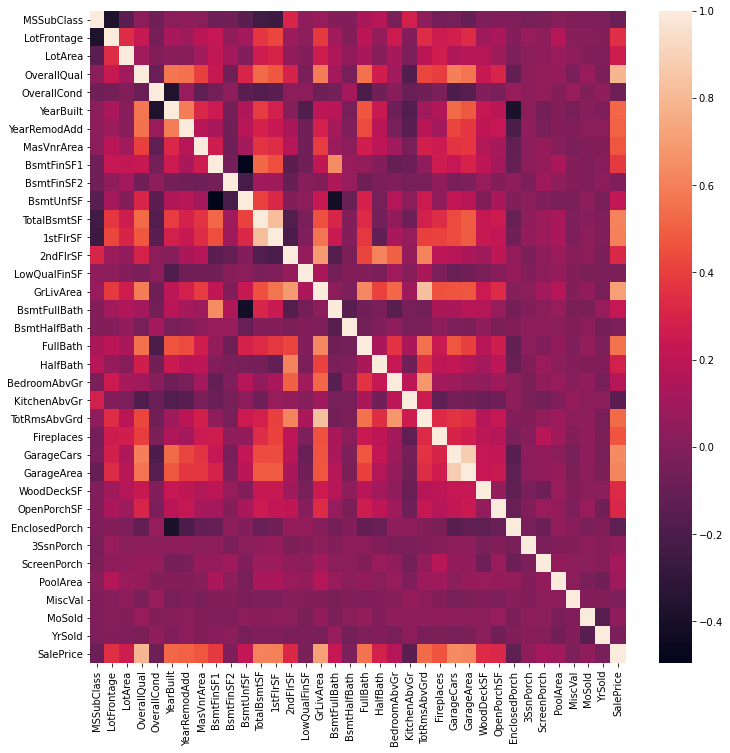

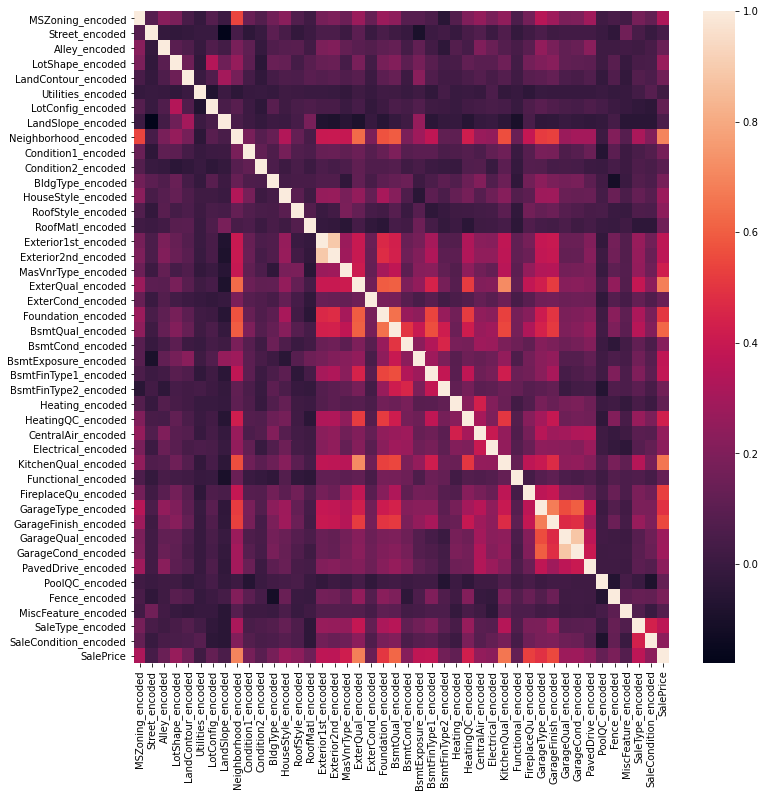

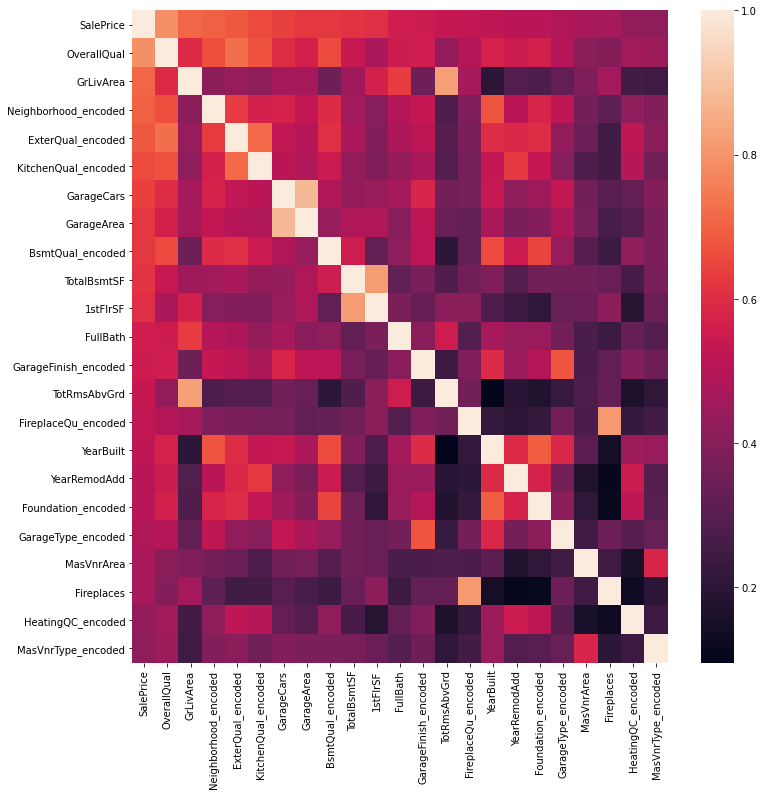

In [25]:
plt.figure(figsize=(12, 12),facecolor='w')
plt.figure(1)
sns.heatmap(corr)
plt.figure(figsize=(12, 12),facecolor='w')
plt.figure(2)
sns.heatmap(corr2)
plt.figure(figsize=(12, 12),facecolor='w')
plt.figure(3)
sns.heatmap(corr3)

In [26]:
data = df[topcorr]

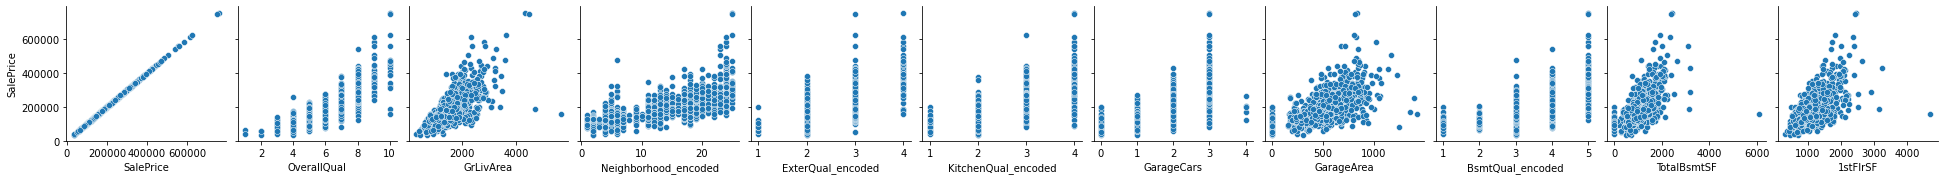

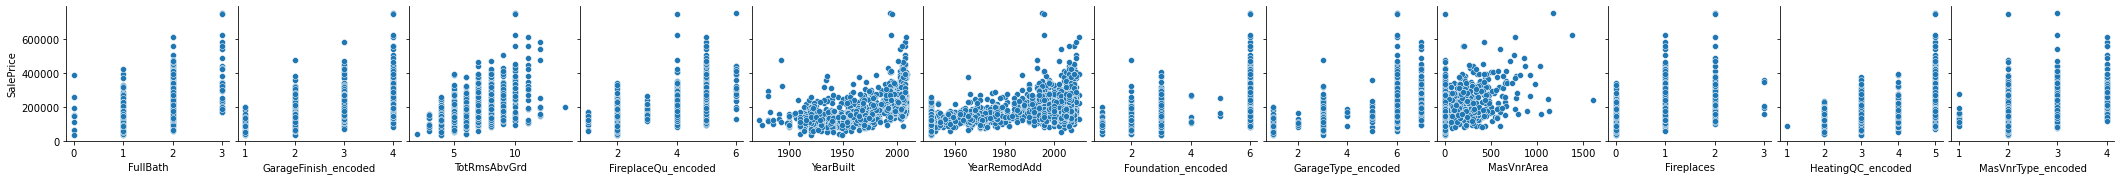

In [27]:
sns.pairplot(data,
             y_vars = ['SalePrice'],
             x_vars = data.columns[:11],
             diag_kind=None)
sns.pairplot(data,
             y_vars = ['SalePrice'],
             x_vars = data.columns[11:],
             diag_kind=None)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

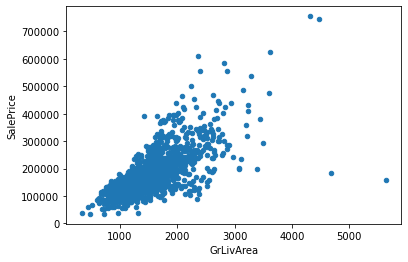

In [28]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

In [29]:
outliers = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index.to_list()
outliers

[523, 1298]

In [30]:
for i in outliers:
    df.drop(i, inplace=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

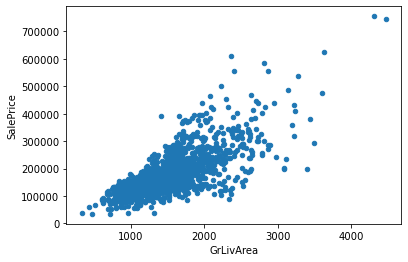

In [31]:
df.plot.scatter(x='GrLivArea', y='SalePrice')

E:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


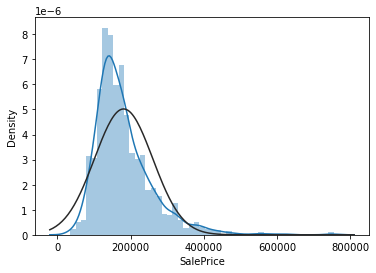

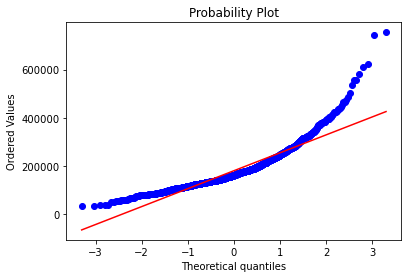

In [32]:
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure(facecolor='w')
res = stats.probplot(df['SalePrice'], plot=plt)

E:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


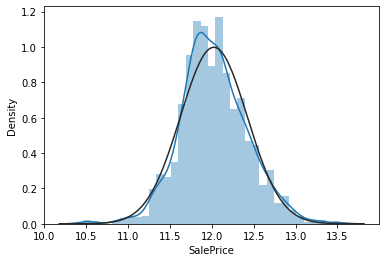

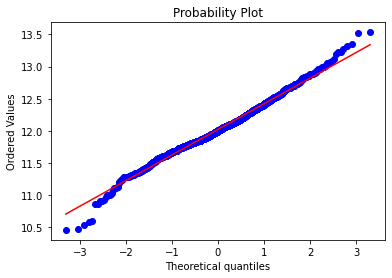

In [33]:
df['SalePrice'] = np.log(df['SalePrice'])

sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure(facecolor='w')
res = stats.probplot(df['SalePrice'], plot=plt)

In [34]:
df = pd.get_dummies(df)

## Linear Regression

In [35]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .5, random_state= 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((729, 441), (729, 441), (729,), (729,))

In [36]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

m = linreg.coef_[0]
b = linreg.intercept_
      
predicted = linreg.predict(x_test)
    
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})   
display(df_pred)

,Actual,Predicted
411,11.884489,11.847942
211,12.133502,12.025901
342,11.379394,11.134214
303,11.917724,11.889942
159,12.676076,12.702413
...,...,...
382,12.271392,12.225474
1231,11.794338,11.762410
1354,12.367341,12.340928
331,11.842229,11.752466


In [37]:
metrics.mean_squared_error(y_test, predicted)

0.024646954049135524

In [38]:
metrics.mean_absolute_error(y_test, predicted)

0.10544938027683391

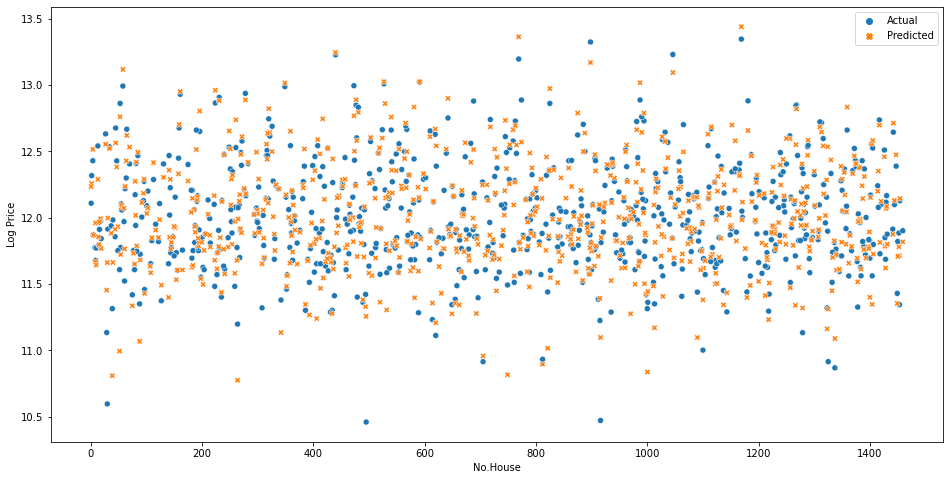

In [58]:
plt.figure(figsize=(16,8),facecolor='w')
sns.scatterplot(data = df_pred)
plt.xlabel('No.House')
plt.ylabel('Log Price');

## Time Series

In [40]:
df['MoYrSold']= pd.to_datetime(df["YrSold"].astype(str) +"-"+ df["MoSold"].astype(str))


In [41]:
df['MoYrSold'].head(3)

0   2008-02-01
1   2007-05-01
2   2008-09-01
Name: MoYrSold, dtype: datetime64[ns]

In [42]:
sales = df[['SalePrice','MoYrSold']]
sales = sales.groupby(['MoYrSold'], as_index=True).sum()
sales.head(3)

,SalePrice
MoYrSold,
2006-01-01,121.376720
2006-02-01,109.460931
2006-03-01,301.284698


In [43]:
sales_ms = sales['SalePrice'].resample('MS').sum()
sales_ms['2006':].head()

MoYrSold
2006-01-01    121.376720
2006-02-01    109.460931
2006-03-01    301.284698
2006-04-01    323.382990
2006-05-01    453.440224
Freq: MS, Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='MoYrSold'>

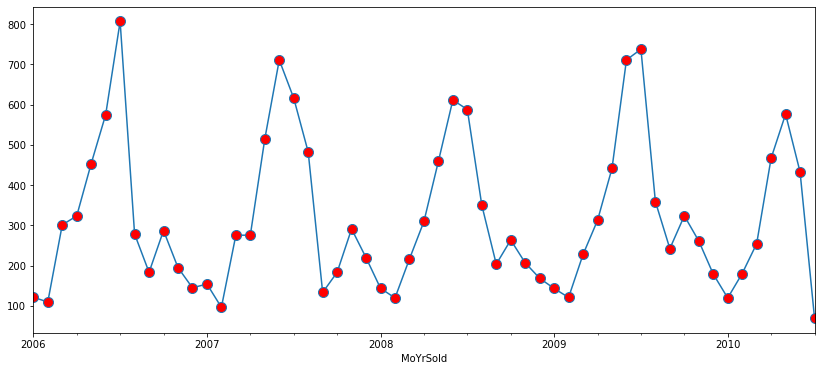

In [44]:
fig = plt.figure(facecolor='w')
sales_ms.plot(figsize=(14,6), marker = "o", markersize=10, markerfacecolor='red')

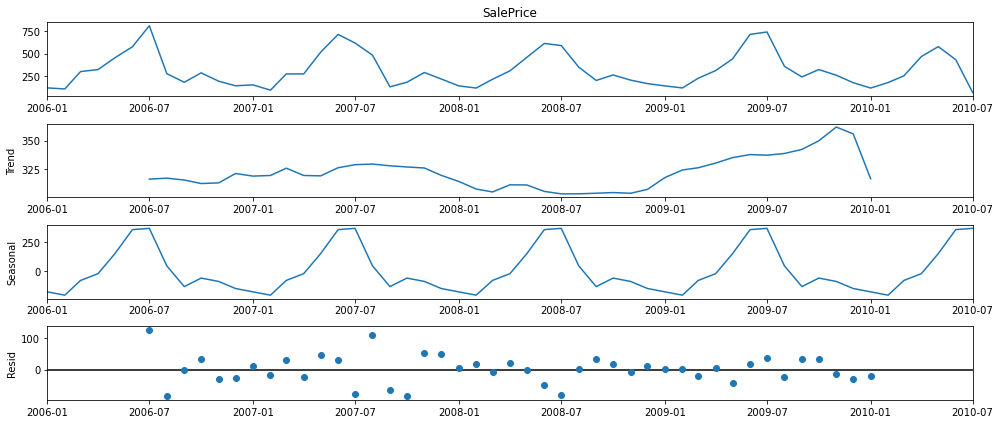

In [45]:
plt.rcParams['figure.figsize']=14,6
decomposition = sm.tsa.seasonal_decompose(sales_ms, model = 'additive')
fig = decomposition.plot()
plt.show()

In [46]:
dftest = adfuller(sales.SalePrice, autolag = None)

print(f'Statistic Test={dftest[0]}')
print(f'P-value={dftest[1]}')
print(f'Critical Values:')

for k, v in dftest[4].items():
    print('\t{}:{} Data is {} stationary with {}% reliance'.format(k, v, "not" if v < dftest[0] else "", 100-int(k[:-1])))

Statistic Test=-2.18251736370814
P-value=0.21265171936280935
Critical Values:
	1%:-3.5925042342183704 Data is not stationary with 99% reliance
	5%:-2.931549768951162 Data is not stationary with 95% reliance
	10%:-2.60406594375338 Data is not stationary with 90% reliance


In [47]:
dftest

(-2.18251736370814,
 0.21265171936280935,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338})

In [48]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list( itertools.product(p,d,q))]
print(f'Sarimax: {pdq[1]} x {seasonal_pdq[1]}')

Sarimax: (0, 0, 1) x (0, 0, 1, 12)


In [49]:
for param in pdq:
    for param_estacional in seasonal_pdq:
        try:
            mod= sm.tsa.statespace.SARIMAX(
              sales_ms,
              order=param,
              seasonal_order=param_estacional,
              enforce_stationarity = False
              )
            results = mod.fit()
            print(f'ARIMA {param} x {param_estacional}12 - AIC:{results.aic}')
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 - AIC:794.5832438941942
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 - AIC:594.1511993326903
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 - AIC:535.1082242256116
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 - AIC:383.68345956816677
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 - AIC:545.5516452860334


E:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 - AIC:529.368828803287
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 - AIC:391.11154434357104
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 - AIC:383.1747537004813
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 - AIC:728.9281316893082
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 - AIC:539.38380060048
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 - AIC:521.183231878041

E:\Programs\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



ARIMA (0, 0, 1) x (0, 1, 1, 12)12 - AIC:362.5813194313865
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 - AIC:541.1087461790275
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 - AIC:514.8570625334949
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 - AIC:384.21828821036434
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 - AIC:371.1765860492639
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 - AIC:691.8440960561306
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 - AIC:525.2597174541548
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 - AIC:528.1224761661302
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 - AIC:362.1304109372533
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 - AIC:530.3033291106811
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 - AIC:517.7757128416229
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 - AIC:374.82890766521166
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 - AIC:363.99560196801684
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 - AIC:676.802144781295
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 - AIC:502.63519297629955
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 - AIC:516.0118436504407
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 - AIC:348.0446645552204
ARIMA (0, 

E:\Programs\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
mod= sm.tsa.statespace.SARIMAX(
          sales_ms,
          order=(1, 1, 1),
          seasonal_order=(1, 1, 0, 12),
          enforce_stationarity = False
      )
results = mod.fit()

In [51]:
predictions = results.get_prediction(start=pd.to_datetime('2009-01-01'))
pred_conf_int = predictions.conf_int()

In [52]:
pred_conf_int.head(3)

,lower SalePrice,upper SalePrice
MoYrSold,,
2009-01-01,-58.762208,364.754709
2009-02-01,-119.140271,303.422741
2009-03-01,45.592059,467.319411


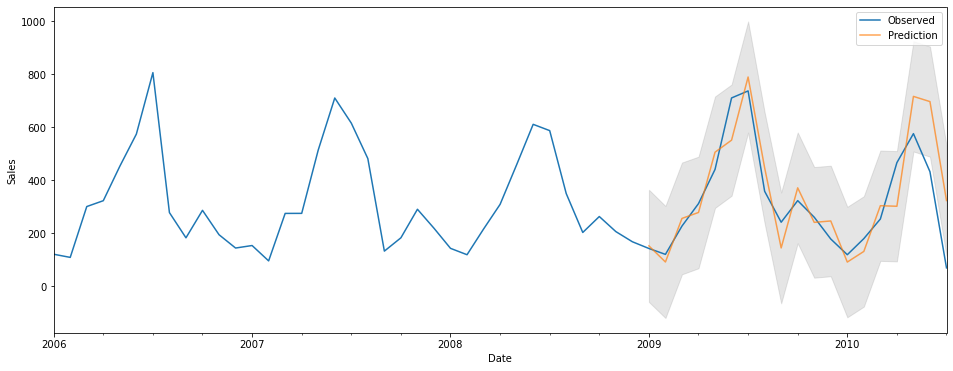

In [53]:
ax = sales_ms['2006':].plot(label='Observed')
predictions.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7, figsize=(16,6))
ax.fill_between(pred_conf_int.index,
                pred_conf_int.iloc[:,0],
                pred_conf_int.iloc[:,1],
                color='gray',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

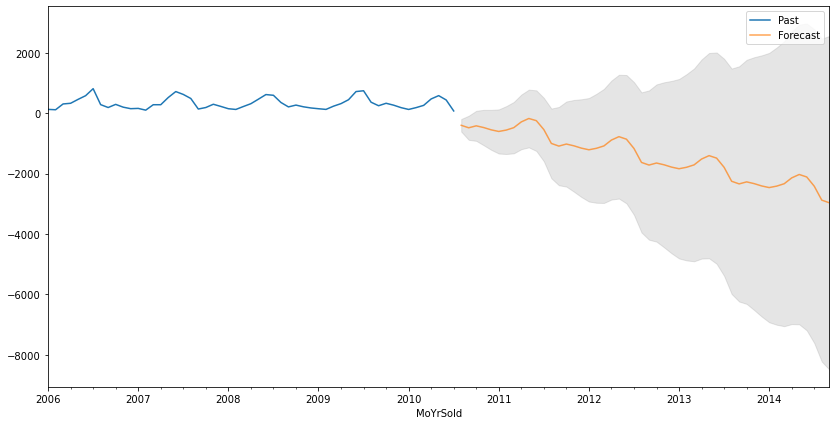

In [54]:
forecast = results.get_forecast(steps=50)
pred_ci=forecast.conf_int()
ax = sales_ms.plot(label='Past')
forecast.predicted_mean.plot(ax=ax, label ='Forecast', alpha =.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='gray',
                alpha=.2)
plt.legend()
plt.show()